In [26]:
from helpers import *
import matplotlib.pyplot as plt
import scipy.stats as stats

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# get the data
articles, categories, links, paths_finished, paths_unfinished, paths_all, shortest_path_distance = load_data()

</div>
<div class="4. Header" style='background-color:#08135c; border-left: solid #darkblue 4px; border-radius: 4px; padding:0.7em;'>
    <span style="color:white;">
       <h2>1. Exploration</h2>
        <h4>Here we will focus on the level of an individual player and the history of the different Wikispeedia games (i.e. between game) that have been played by that person consecutively.</h4>
    </span>
</div>
</div>

</div>
<div class="1.1 explanation" style='background-color:#08135c; border-left: solid #darkblue 4px; border-radius: 4px; padding:0.7em;'>
    <span style="color:white">
       <h3>1.1 Game distribution per player</h3>
    </span>
</div>
</div>
<div class="1.1 explanation" style='background-color:#faefe1; border-left: solid #darkblue 4px; border-radius: 4px; padding:0.7em;'>
    <span style="color:black">
        We can globally categorize the <span style="font-family: monospace; background-color:#fadfb9; padding-left:4px; padding-right:4px; border-radius: 5px;">between_game</span> game history (chronologically) in 3 groups:
        <ul>
            <li> <code class='python'>finished</code>: The player's last game was a <code class='python'>finished</code> path (e.g. <code class='python'>[timeout, restart, finished]</code>)</li>
            <li> <code class='python'>timeout</code>: The player's last game was a <code class='python'>finished</code> timeout (e.g. <code class='python'>[timeout, restart, timeout]</code>)</li>
            <li> <code class='python'>restart</code>: The player's last game was a <code class='python'>finished</code> restart (e.g. <code class='python'>[timeout, restart, restart]</code>)</li>
        </ul>
        Per category, we want to find and display the distribution for the number of succesfully <code class='python'>finished</code> games. Firsts we need to extract the  <span style="font-family: monospace; background-color:#fadfb9; padding-left:4px; padding-right:4px; border-radius: 5px;">between_game</span> history per player. From that, we can extract the <span style="font-family: monospace; background-color:#fadfb9; padding-left:4px; padding-right:4px; border-radius: 5px;">last_game</span> and <span style="font-family: monospace; background-color:#fadfb9; padding-left:4px; padding-right:4px; border-radius: 5px;">nb_finished_games</span> columns. Here we assume that the <span style="font-family: monospace; background-color:#fadfb9; padding-left:4px; padding-right:4px; border-radius: 5px;">hashedIpAddress</span> refers the a single unique player.
    </span>
</div>


In [5]:
#Create DataFrame with chronological (between_game) history of games player
players_record = pd.DataFrame(paths_all.sort_values('timestamp').groupby('hashedIpAddress')['type'].apply(list))
players_record = players_record.rename(columns={'type': 'between_game'})

#Display snipped of result
players_record.head(4)

,between_game
hashedIpAddress,
000386124f307de8,"[finished, timeout]"
0007183207b6008f,"[finished, finished, finished]"
000a09e202e88d10,[finished]
000a5bac5b7781ea,[finished]


In [6]:
#Now extract last_game column
players_record['last_game'] = players_record['between_game'].apply(lambda l : l[-1])

#Now extract nb_finished_games, nb_restart_games and nb_timeout_games and nb_total_games column
players_record['nb_finished_games'] = players_record['between_game'].apply(lambda x: x.count('finished'))
players_record['nb_restart_games'] = players_record['between_game'].apply(lambda x: x.count('restart'))
players_record['nb_timeout_games'] = players_record['between_game'].apply(lambda x: x.count('timeout'))
players_record['nb_total_games'] = players_record['between_game'].apply(lambda x: len(x))

#Display snipped of results
players_record.head(10)

,between_game,last_game,nb_finished_games,nb_restart_games,nb_timeout_games,nb_total_games
hashedIpAddress,,,,,,
000386124f307de8,"[finished, timeout]",timeout,1,0,1,2
0007183207b6008f,"[finished, finished, finished]",finished,3,0,0,3
000a09e202e88d10,[finished],finished,1,0,0,1
000a5bac5b7781ea,[finished],finished,1,0,0,1
000a6e585b776c96,[timeout],timeout,0,0,1,1
000bc9fe5640ed31,"[finished, finished]",finished,2,0,0,2
000d397013f09039,"[finished, finished]",finished,2,0,0,2
000e5d4c2c8e921f,"[finished, restart, restart, timeout]",timeout,1,2,1,4
000e954305ddb434,[finished],finished,1,0,0,1


<div class="1.1 explanation" style='background-color:#faefe1; border-left: solid #darkblue 4px; border-radius: 4px; padding:0.7em;'>
    <span style="color:black">
        Let's now compare the <span style="font-family: monospace; background-color:#fadfb9; padding-left:4px; padding-right:4px; border-radius: 5px;">between_game</span> for the different players. We first want look at the following two extremes:
        <ul>
            <li> Players that <b>only</b> contain <code class='python'>finished</code> games in their <span style="font-family: monospace; background-color:#fadfb9; padding-left:4px; padding-right:4px; border-radius: 5px;">between_game</span> history </li>
            <li> Players that contain <b>no</b> <code class='python'>finished</code> games in their <span style="font-family: monospace; background-color:#fadfb9; padding-left:4px; padding-right:4px; border-radius: 5px;">between_game</span> history at all</li>
        </ul>
    </span>
</div>

Type                                        Number           Percentage
Total number of unique players		:   18948            100%
Players with finished games only	:   9704             51%
Player with no finished games at all	:   4705             25%
Remaining players			:   4539             24%


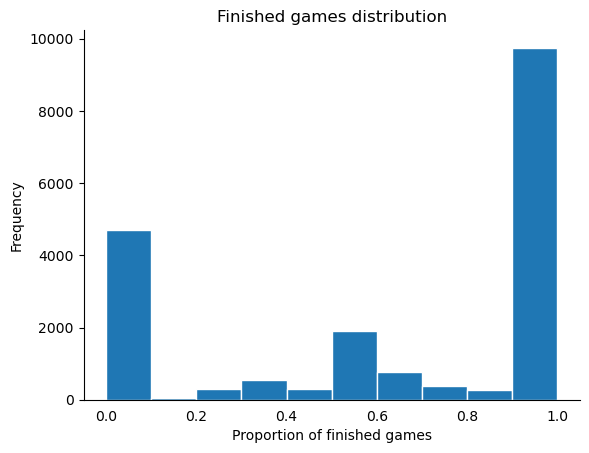

In [8]:
#Compute number of players in total
nb_players = len(players_record)

#Compute number of player that only contain finished games in their between_game history
nb_finished_only = len(players_record[players_record['nb_finished_games'] == players_record['nb_total_games']])

#Compute number of player contain no finished games in their between_game history at all
nb_finished_none = len(players_record[players_record['nb_finished_games'] == 0])

#Print results
print('{} {:>45} {:>20}'.format('Type', 'Number', 'Percentage'))
print('Total number of unique players\t\t: {:>7} {:>14.0f}%'.format(nb_players, nb_players/nb_players * 100))
print('Players with finished games only\t: {:>6} {:>14.0f}%'.format(nb_finished_only, nb_finished_only/nb_players * 100))
print('Player with no finished games at all\t: {:>6} {:>14.0f}%'.format(nb_finished_none, nb_finished_none/nb_players * 100))
print('Remaining players\t\t\t: {:>6} {:>14.0f}%'.format(nb_players-nb_finished_only-nb_finished_none, (nb_players-nb_finished_only-nb_finished_none)/nb_players * 100))

#Display histogram for visualization
fig, ax = plt.subplots()
plt.title('Finished games distribution')
ax.hist(players_record['nb_finished_games']/players_record['nb_total_games'], edgecolor=(1,1,1))
ax.set_ylabel('Frequency', fontsize=10)
ax.set_xlabel('Proportion of finished games', fontsize=10)
ax.tick_params(bottom=False);
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#fig.savefig('figures/finished_distribution.svg')

<div class="1.1 explanation" style='background-color:#faefe1; border-left: solid #darkblue 4px; border-radius: 4px; padding:0.7em;'>
    <span style="color:black">
        Hence we observe that a substantial <b>25%</b> of the total number of players do not have any finished game at all!!! This is a big loss! Imagine if this portion would also have had succesful attempts (i.e. <code class='python'>finished</code> games). Then there would have been much more data on <code class='python'>finished</code> games to do further analysis on. Hence, we would like to find out why they stopped playing in the first place. This can help in finding strategies to keep these players engaged to potentially generate more data on <code class='python'>finished</code> games. <br><br> Let's first dig deeper into the players with no <code class='python'>finished</code> games at all. We want to get a sense of what their <span style="font-family: monospace; background-color:#fadfb9; padding-left:4px; padding-right:4px; border-radius: 5px;">between_game</span> history looks like.
    </span>
</div>

</div>
<div class="1.1 explanation" style='background-color:#08135c; border-left: solid #darkblue 4px; border-radius: 4px; padding:0.7em;'>
    <span style="color:white">
       <h3>1.2 Between game history of players with no <code class='python'>finished</code> games at all.</h3>
    </span>
</div>
</div>
<div class="1.1 explanation" style='background-color:#faefe1; border-left: solid #darkblue 4px; border-radius: 4px; padding:0.7em;'>
    <span style="color:black">
        In this we select the players with no <code class='python'>finished</code> games at all followed by analyzing their <span style="font-family: monospace; background-color:#fadfb9; padding-left:4px; padding-right:4px; border-radius: 5px;">between_game</span> history.
    </span>
</div>

In [9]:
#Display snipped of players with no finished games at all
players_record[players_record['nb_finished_games'] == 0][['between_game', 'nb_total_games']].head(5)

,between_game,nb_total_games
hashedIpAddress,,
000a6e585b776c96,[timeout],1
0011acb93ed0090b,"[restart, timeout]",2
0015865e516d4932,[restart],1
00210d6f590f218c,[timeout],1
0032432015bedad6,[timeout],1


<div class="1.1 explanation" style='background-color:#faefe1; border-left: solid #darkblue 4px; border-radius: 4px; padding:0.7em;'>
    <span style="color:black">
        We first want to visualize the number of attempt/games played by these players.
    </span>
</div>

#games     proportion
1          0.8117
2          0.1481
3          0.0298
4          0.0081
5          0.0019
6          0.0002
7          0.0002


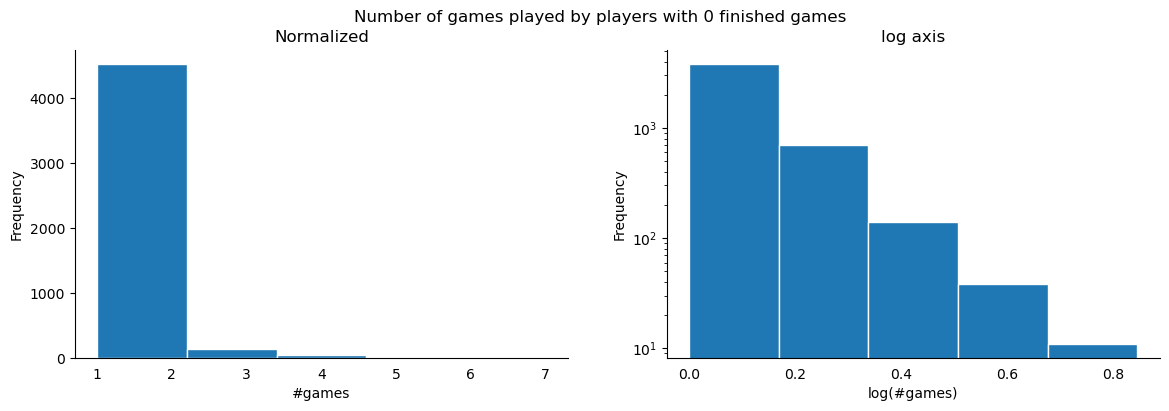

In [10]:
#Extract distribution of number of attempts/games
number_total_games = players_record[(players_record['nb_finished_games'] == 0)]['nb_total_games']
number_attemps_dist = players_record[players_record['nb_finished_games'] == 0]['nb_total_games'].value_counts(normalize=True).sort_index()

#Print results
print('{:<10} {}'.format('#games', 'proportion'))
for g, p in number_attemps_dist.items():
      print('{:<10} {:<5.4f}'.format(g, p))
        
#Visualize distribution
fig, ax = plt.subplots(1,2, figsize=(14,4))
plt.suptitle('Number of games played by players with 0 finished games')
ax= ax.ravel()

#Number of games distrubiton on default axis
ax[0].hist(number_total_games, edgecolor=(1,1,1), bins=5)
ax[0].set_title('Normalized')
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('#games')
ax[0].tick_params(bottom=False);
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

#Number of games distrubiton on log axis
ax[1].hist(np.log10(number_total_games), edgecolor=(1,1,1), log=True, bins=5)
ax[1].set_title('log axis')
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel('log(#games)')
ax[1].tick_params(bottom=False);
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

<div class="1.1 explanation" style='background-color:#faefe1; border-left: solid #darkblue 4px; border-radius: 4px; padding:0.7em;'>
    <span style="color:black">
        Hence we find that the number of games played by players with 0 finished games follows a power-law. Thus the majority (81%) only has 1 attempt that is either a <code class='python'>restart</code> or a <code class='python'>timeout</code>. Does this mean that this single attempt is so frustrating that the player decides to terminate and never come back?<br><br>
        Let's first look at the <span style="font-family: monospace; background-color:#fadfb9; padding-left:4px; padding-right:4px; border-radius: 5px;">pathLength</span> distribution of these single attemps.
    </span>
</div>

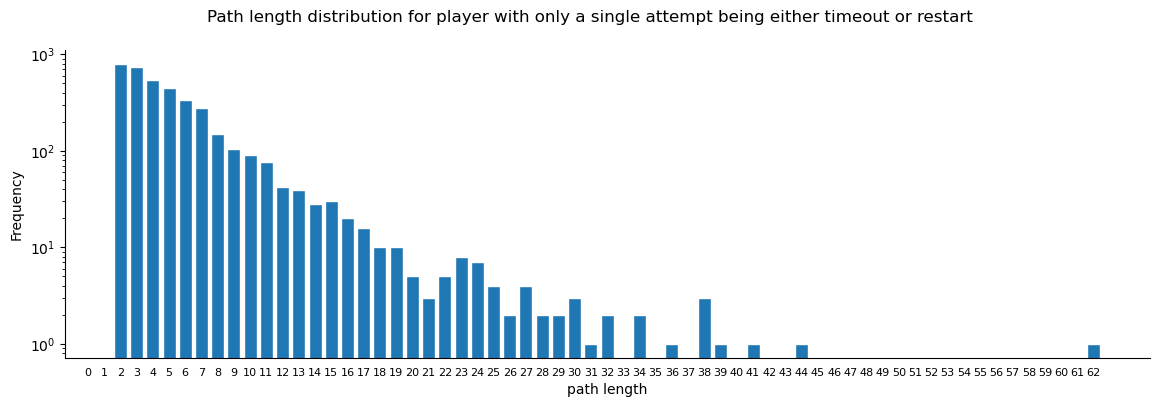

In [11]:
#Get all the hashedIpaddress of the players that have only 1 attempt that is either a restart or timeout
hashedIpaddress_selection = players_record[(players_record['nb_finished_games'] == 0) & (players_record['nb_total_games'] == 1)].index

#Extract path lengths
path_lengths_selection = paths_all.set_index('hashedIpAddress').loc[hashedIpaddress_selection]['pathLength'].value_counts()

#Display histogram for visualization
fig, ax = plt.subplots(figsize=(14,4))
plt.suptitle('Path length distribution for player with only a single attempt being either timeout or restart')

#Number of games distrubiton on log axis
ax.bar(path_lengths_selection.index, path_lengths_selection, edgecolor=(1,1,1), log=True)
ax.set_ylabel('Frequency')
ax.set_xlabel('path length')
ax.tick_params(bottom=False);
ax.set_xticks(range(max(path_lengths_selection.index)+1));
ax.tick_params(axis='x', which='major', labelsize=8)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

<div class="1.1 explanation" style='background-color:#faefe1; border-left: solid #darkblue 4px; border-radius: 4px; padding:0.7em;'>
    <span style="color:black">
        Again we observe that the bulk of the data lies on the left side. This makes sense as only a small fraction perservere before eventually giving up.<br><br>
        Let's move on to the other group with partially <code class='python'>finished</code> games.
    </span>
</div>

</div>
<div class="1.1 explanation" style='background-color:#08135c; border-left: solid #darkblue 4px; border-radius: 4px; padding:0.7em;'>
    <span style="color:white">
       <h3>1.3 Between game history of players with partially <code class='python'>finished</code> games.</h3>
    </span>
</div>
</div>
<div class="1.1 explanation" style='background-color:#faefe1; border-left: solid #darkblue 4px; border-radius: 4px; padding:0.7em;'>
    <span style="color:black">
        In this we select the players with partial <code class='python'>finished</code> games at all followed by analyzing their <span style="font-family: monospace; background-color:#fadfb9; padding-left:4px; padding-right:4px; border-radius: 5px;">between_game</span> history, similar to section <b>1.2</b>.
    </span>
</div>

In [12]:
#Display snipped of players within the 24% category
partially_finished = players_record[(players_record['nb_finished_games'] != 0) & (players_record['nb_finished_games'] != players_record['nb_total_games'])]
partially_finished.head(10)

,between_game,last_game,nb_finished_games,nb_restart_games,nb_timeout_games,nb_total_games
hashedIpAddress,,,,,,
000386124f307de8,"[finished, timeout]",timeout,1,0,1,2
000e5d4c2c8e921f,"[finished, restart, restart, timeout]",timeout,1,2,1,4
00381d0a21b8ba73,"[restart, finished, finished, finished, finish...",finished,5,1,0,6
003a34e80bdab60d,"[restart, finished]",finished,1,1,0,2
003de5ad49bf14e9,"[finished, timeout]",timeout,1,0,1,2
0045bac960aed861,"[restart, restart, restart, finished, finished...",timeout,8,7,2,17
0068f6c30855b1fd,"[finished, finished, restart, finished, finish...",restart,4,2,0,6
007519dc19b7e34e,"[finished, timeout]",timeout,1,0,1,2
007b13af674035a0,"[restart, finished, restart, restart, restart,...",timeout,2,4,1,7


In [13]:
#Extract distribution of number of attempts/games
number_total_games = players_record[(players_record['nb_finished_games'] != 0) & (players_record['nb_finished_games'] != players_record['nb_total_games'])]['nb_total_games']
number_attemps_dist = number_total_games.value_counts(normalize=True).sort_index()

#Print results
print('{:<10} {}'.format('#games', 'proportion'))
for g, p in number_attemps_dist.items():
      print('{:<10} {:<5.4f}'.format(g, p))

#games     proportion
2          0.2344
3          0.1800
4          0.1256
5          0.0905
6          0.0659
7          0.0476
8          0.0399
9          0.0353
10         0.0223
11         0.0229
12         0.0183
13         0.0165
14         0.0121
15         0.0088
16         0.0088
17         0.0073
18         0.0051
19         0.0059
20         0.0035
21         0.0040
22         0.0031
23         0.0022
24         0.0026
25         0.0022
26         0.0026
27         0.0031
28         0.0009
29         0.0022
30         0.0009
31         0.0011
32         0.0015
33         0.0009
34         0.0007
35         0.0020
36         0.0011
37         0.0004
38         0.0018
39         0.0002
40         0.0004
41         0.0004
42         0.0007
43         0.0007
44         0.0007
45         0.0009
46         0.0002
47         0.0009
48         0.0002
49         0.0002
50         0.0004
51         0.0002
52         0.0002
53         0.0004
54         0.0007
56         0.0002
57    

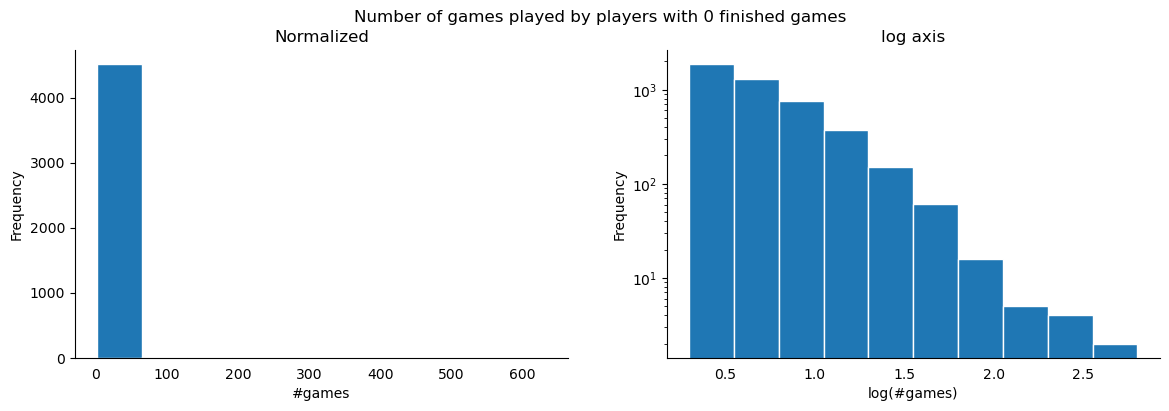

In [14]:
#Visualize distribution
fig, ax = plt.subplots(1,2, figsize=(14,4))
plt.suptitle('Number of games played by players with 0 finished games')
ax= ax.ravel()

#Number of games distrubiton on default axis
ax[0].hist(number_total_games, edgecolor=(1,1,1))
ax[0].set_title('Normalized')
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('#games')
ax[0].tick_params(bottom=False);
#ax[0].set_xticks(range(max(number_attemps_dist.index)+1));
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

#Number of games distrubiton on log axis
ax[1].hist(np.log10(number_total_games), edgecolor=(1,1,1), log=True)
ax[1].set_title('log axis')
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel('log(#games)')
ax[1].tick_params(bottom=False);
#ax[1].set_xticks(range(max(number_attemps_dist.index)+1));
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

</div>
<div class="1.1 explanation" style='background-color:#08135c; border-left: solid #darkblue 4px; border-radius: 4px; padding:0.7em;'>
    <span style="color:white">
       <h3>1.4 Between game history of players only <code class='python'>finished</code> games.</h3>
    </span>
</div>
</div>
<div class="1.1 explanation" style='background-color:#faefe1; border-left: solid #darkblue 4px; border-radius: 4px; padding:0.7em;'>
    <span style="color:black">
        In this we select the players with only<code class='python'>finished</code> games at all followed by analyzing their <span style="font-family: monospace; background-color:#fadfb9; padding-left:4px; padding-right:4px; border-radius: 5px;">between_game</span> history, similar to section <b>1.2</b> and <b>1.3</b>.
    </span>
</div>

In [15]:
#Display snipped of players within the 24% category
only_finished = players_record[(players_record['nb_finished_games'] == players_record['nb_total_games'])]
only_finished.head(10)

,between_game,last_game,nb_finished_games,nb_restart_games,nb_timeout_games,nb_total_games
hashedIpAddress,,,,,,
0007183207b6008f,"[finished, finished, finished]",finished,3,0,0,3
000a09e202e88d10,[finished],finished,1,0,0,1
000a5bac5b7781ea,[finished],finished,1,0,0,1
000bc9fe5640ed31,"[finished, finished]",finished,2,0,0,2
000d397013f09039,"[finished, finished]",finished,2,0,0,2
000e954305ddb434,[finished],finished,1,0,0,1
0013e00d2529e52c,"[finished, finished, finished, finished, finis...",finished,7,0,0,7
001a0e3b756ed203,"[finished, finished]",finished,2,0,0,2
00216ef93a2a60bb,[finished],finished,1,0,0,1


In [16]:
#Extract distribution of number of attempts/games
number_total_games = players_record[(players_record['nb_finished_games'] == players_record['nb_total_games'])]['nb_total_games']
number_attemps_dist = number_total_games.value_counts(normalize=True).sort_index()

#Print results
print('{:<10} {}'.format('#games', 'proportion'))
for g, p in number_attemps_dist.items():
      print('{:<10} {:<5.4f}'.format(g, p))

#games     proportion
1          0.5458
2          0.1887
3          0.0881
4          0.0558
5          0.0295
6          0.0201
7          0.0145
8          0.0106
9          0.0072
10         0.0070
11         0.0046
12         0.0040
13         0.0036
14         0.0027
15         0.0015
16         0.0016
17         0.0009
18         0.0013
19         0.0009
20         0.0010
21         0.0011
22         0.0009
23         0.0006
24         0.0008
25         0.0002
26         0.0005
27         0.0003
28         0.0005
29         0.0002
30         0.0005
31         0.0002
32         0.0005
33         0.0003
34         0.0002
35         0.0003
36         0.0001
37         0.0002
38         0.0001
39         0.0002
40         0.0001
45         0.0002
47         0.0002
51         0.0001
52         0.0001
60         0.0001
61         0.0001
62         0.0001
71         0.0001
75         0.0002
80         0.0001
81         0.0001
83         0.0001
109        0.0001
113        0.0001
118   

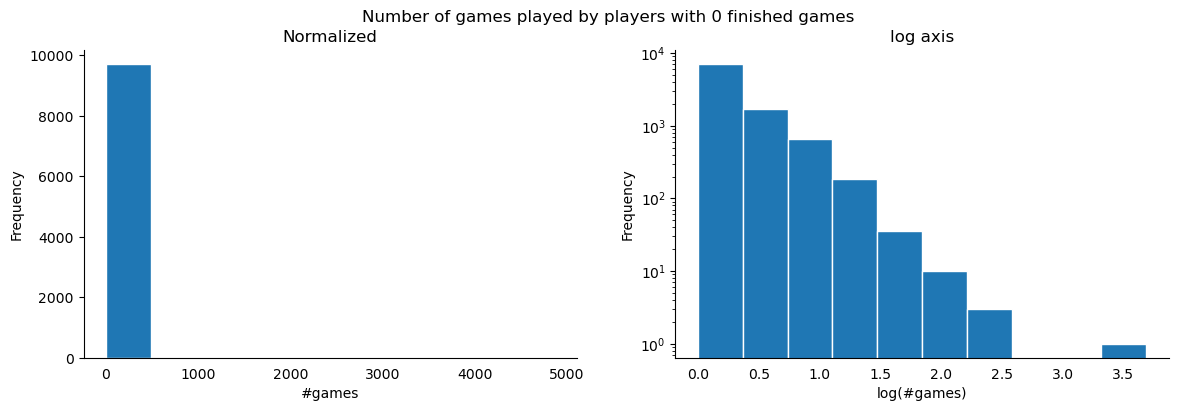

In [17]:
#Visualize distribution
fig, ax = plt.subplots(1,2, figsize=(14,4))
plt.suptitle('Number of games played by players with 0 finished games')
ax= ax.ravel()

#Number of games distrubiton on default axis
ax[0].hist(number_total_games, edgecolor=(1,1,1))
ax[0].set_title('Normalized')
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('#games')
ax[0].tick_params(bottom=False);
#ax[0].set_xticks(range(max(number_attemps_dist.index)+1));
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

#Number of games distrubiton on log axis
ax[1].hist(np.log10(number_total_games), edgecolor=(1,1,1), log=True)
ax[1].set_title('log axis')
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel('log(#games)')
ax[1].tick_params(bottom=False);
#ax[1].set_xticks(range(max(number_attemps_dist.index)+1));
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

</div>
<div class="1.1 explanation" style='background-color:#08135c; border-left: solid #darkblue 4px; border-radius: 4px; padding:0.7em;'>
    <span style="color:white">
       <h3>1.5 last game <code class='python'>unfinished</code> vs last game <code class='python'>finished</code>.</h3>
    </span>
</div>
</div>
<div class="1.1 explanation" style='background-color:#faefe1; border-left: solid #darkblue 4px; border-radius: 4px; padding:0.7em;'>
    <span style="color:black">
        So far could observe 2 phenomenon. 
        <ul>
            <li> First it looks like that people ending on a <code class='python'>unfinished</code> (i.e. <span style="font-family: monospace; background-color:#fadfb9; padding-left:4px; padding-right:4px; border-radius: 5px;">timeout</span> or <span style="font-family: monospace; background-color:#fadfb9; padding-left:4px; padding-right:4px; border-radius: 5px;">restart</span>) tend to play less games overall</li>
            <li> Another observation suggests that people ending on a <code class='python'>unfinished</code> (i.e. <span style="font-family: monospace; background-color:#fadfb9; padding-left:4px; padding-right:4px; border-radius: 5px;">timeout</span> or <span style="font-family: monospace; background-color:#fadfb9; padding-left:4px; padding-right:4px; border-radius: 5px;">restart</span>) tend to have a lower percentage of finished paths in their history.</li>          
        </ul><br>
        We will perform some hypothesis testing to check this assumption. As the number of games played follows a power-law, we compare the geometric means. For the finished path percentage we can take the conventional mean.
    </span>
</div>

In [ ]:
#Extract player finishing on a finished game and get finished percentage
last_finished = players_record[(players_record['last_game'] == 'finished') & (players_record['nb_finished_games'] != players_record['nb_total_games'])]
last_finished['prop_finished'] = last_finished['nb_finished_games']/last_finished['nb_total_games']

#Extract player finishing on an unfinished game and get finished percentage
last_unfinished = players_record[(players_record['last_game'] != 'finished') & (players_record['nb_finished_games'] != 0)]
last_unfinished['prop_finished'] = last_unfinished['nb_finished_games']/last_unfinished['nb_total_games']

In [28]:
#independent sample t-test that mean(last_finished['prop_finished']) > mean(last_unfinished['prop_finished'])
t_stat_prop_finished, p_val_prop_finished = stats.ttest_ind(last_finished['prop_finished'], last_unfinished['prop_finished'], equal_var=False, alternative='greater')

In [29]:
p_val_prop_finished

1.7348443365225956e-80

In [30]:
#calculate bootstrap geometric
ci_finished, stats_finished = bootstrap_CI(last_finished['prop_finished'], 10000, 'arithmetic', True)

#calculate bootstrap geometric
ci_unfinished, stats_unfinished = bootstrap_CI(last_unfinished['prop_finished'], 10000, 'arithmetic', True)


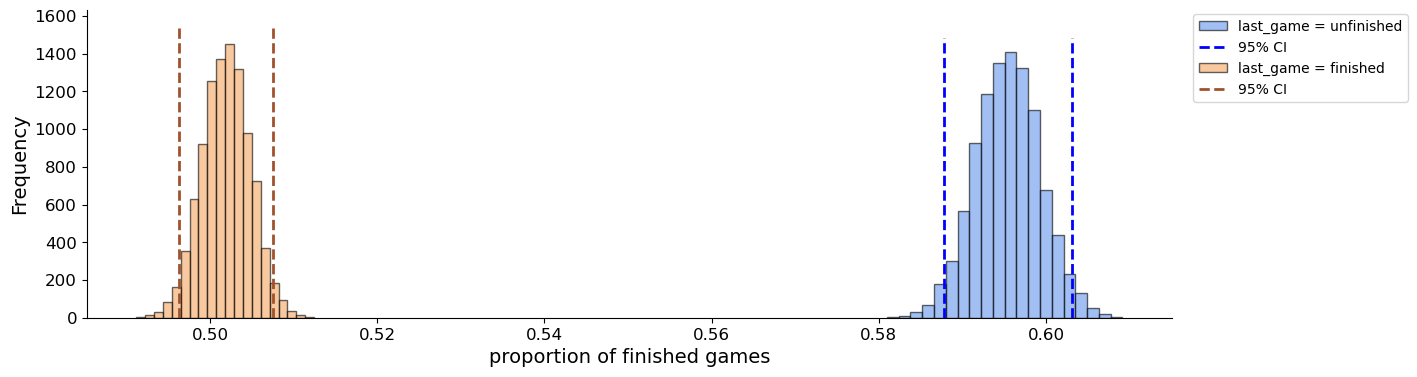

In [32]:
#Plot confidence intervals
fig, ax = plt.subplots(figsize=(14,4))

#finished
ax.hist(stats_finished, bins=20, edgecolor = 'k', color='cornflowerblue',alpha = 0.6, label = 'last_game = unfinished')
ax.vlines(ci_finished, 0, ax.get_ylim()[1], ls='--', color='blue', linewidth=2, label = '95% CI')

#unfinished
ax.hist(stats_unfinished, bins=20, edgecolor = 'k', color='sandybrown', alpha = 0.6, label = 'last_game = finished')
ax.vlines(ci_unfinished, 0, ax.get_ylim()[1], ls='--', color='sienna', linewidth=2, label = '95% CI')

ax.set_xlabel('proportion of finished games', fontsize=14)
ax.set_ylabel('Frequency',  fontsize=14)
ax.legend(loc=(1.02, 0.70));

#Remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=12)

#fig.savefig('figures/prop_finished_games.svg', bbox_inches='tight')
